In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
df = pd.read_csv("Hackathon_Working_Data.csv")
df

,MONTH,STORECODE,DAY,BILL_ID,BILL_AMT,QTY,VALUE,PRICE,GRP,SGRP,SSGRP,CMP,MBRD,BRD
0,M1,N1,4,T375,225.0,1.0,225.0,225.0,BUTTER MARGR (4/94),BUTTER,SALTED,G C M M F,AMUL,AMUL
1,M1,N1,4,T379,95.0,1.0,95.0,95.0,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,PARLE PRODS,MELODY,MELODY CHOCOLATY
2,M1,N1,4,T381,10.0,1.0,10.0,10.0,CHOCOLATE,CHOCOLATE PANNED,CHOCOLATE PANNED,MONDELEZ INTERNATIONAL,CADBURY SHOTS,CADBURY SHOTS
3,M1,N1,4,T382,108.0,1.0,108.0,108.0,PACKAGED TEA,MAIN PACKS,MAIN PACKS,GUJ TEA PROCESSORS,WAGH BAKRI,WAGH BAKRI INSTANT
4,M1,N1,4,T384,19.0,1.0,19.0,19.0,ALL IODISED SALT,POWDERED SALT,POWDERED SALT,TATA CHEM,TATA,TATA SALT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26980,M3,N10,31,T5999,10.0,1.0,10.0,10.0,BISCUITS - CORE & NON CORE,NON-SALT CRACKER,NON-SALT CRACKER,PARLE PRODS,PARLE KRACK JACK,PARLE KRACK JACK
26981,M3,N10,31,T6007,88.0,1.0,10.0,10.0,BISCUITS - CORE & NON CORE,MARIE,MARIE,PARLE PRODS,PARLE MARIE,PARLE MARIE
26982,M3,N10,31,T6007,88.0,2.0,20.0,10.0,BISCUITS - CORE & NON CORE,GLUCOSE,GLUCOSE,PARLE PRODS,PARLE-G,PARLE-G
26983,M3,N10,31,T6007,88.0,1.0,58.0,58.0,CLEANERS - GLASS,LIQUIDS,LIQUIDS,RECKITT BENCKISER,COLIN,COLIN


In [13]:
df.shape

(18099, 14)

In [14]:
df.describe()

,DAY,BILL_AMT,QTY,VALUE,PRICE
count,18099.000000,18099.000000,18099.000000,18099.000000,18099.000000
mean,15.233494,253.523531,5.129178,64.441844,50.003658
std,8.897580,450.430464,115.832017,110.666823,79.296766
min,1.000000,0.000000,0.500000,0.000000,0.000000
25%,7.000000,34.000000,1.000000,10.000000,10.000000
50%,14.000000,102.000000,1.000000,30.000000,20.000000
75%,23.000000,257.000000,2.000000,76.000000,60.000000
max,31.000000,5151.000000,12000.000000,2250.000000,2175.000000


In [15]:
df.nunique()

MONTH           3
STORECODE      10
DAY            31
BILL_ID      5256
BILL_AMT     1203
QTY            40
VALUE         566
PRICE         446
GRP            79
SGRP          170
SSGRP         225
CMP           310
MBRD          592
BRD          1151
dtype: int64

In [16]:
df['DAY'].unique()
df.isnull().sum()

MONTH        0
STORECODE    0
DAY          0
BILL_ID      0
BILL_AMT     0
QTY          0
VALUE        0
PRICE        0
GRP          0
SGRP         0
SSGRP        0
CMP          1
MBRD         1
BRD          1
dtype: int64

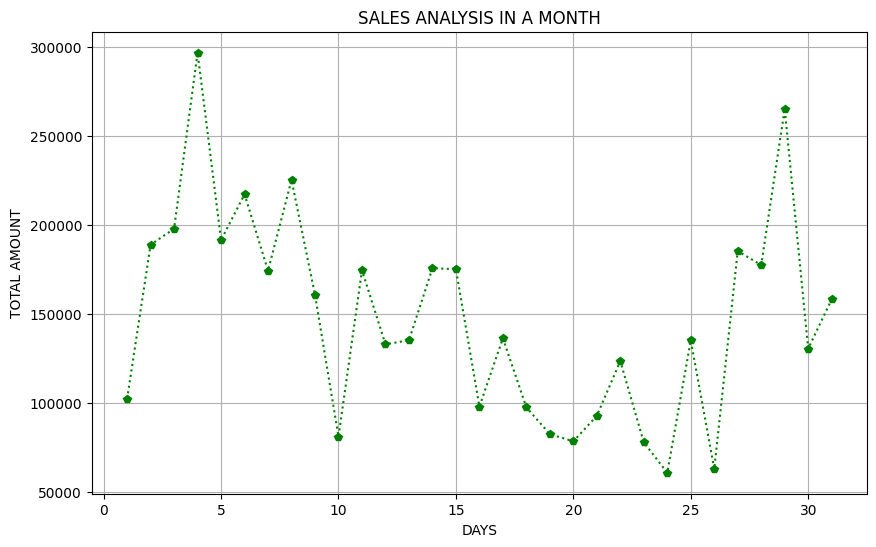

In [20]:
yearly_totals = df.groupby('DAY')['BILL_AMT'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(yearly_totals['DAY'], yearly_totals['BILL_AMT'], marker='p', linestyle=':', color='green')
plt.title('SALES ANALYSIS IN A MONTH')
plt.xlabel('DAYS')
plt.ylabel('TOTAL AMOUNT')
plt.grid(True)
plt.show()

In [21]:
total_sales=df.groupby('GRP')['BILL_AMT'].sum().reset_index()
topsales= total_sales.sort_values(by='BILL_AMT', ascending=False).head(5)
print(topsales)

                              GRP   BILL_AMT
10     BISCUITS - CORE & NON CORE  763277.65
78        WASHING POWDERS/LIQUIDS  312060.91
67                 SPICES (03/04)  298050.97
51                   PACKAGED TEA  296642.41
56  REFINED EDIBLE OILS-ALL PACKS  222550.64


In [22]:
top_stores=pd.DataFrame(columns=['STORECODE', 'CMP', 'BILL_AMT'])
storeco= df['STORECODE'].unique()

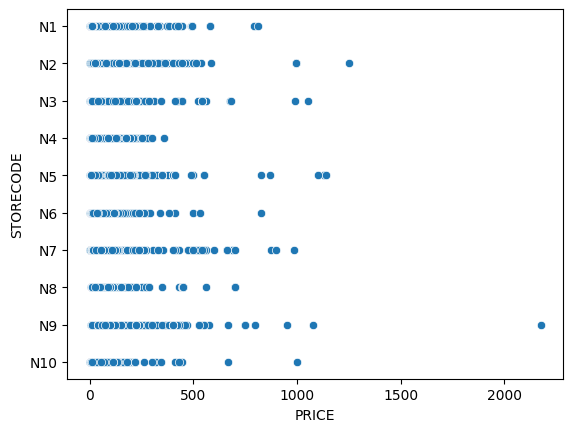

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot( x="PRICE", y='STORECODE', data=df)
plt.show()

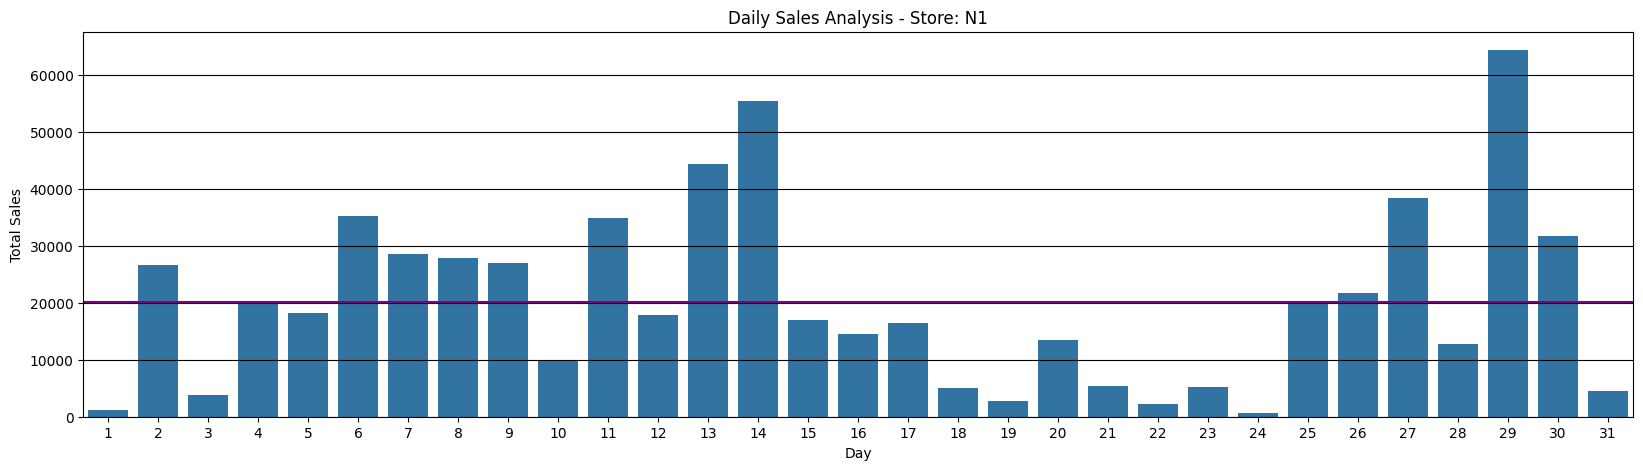

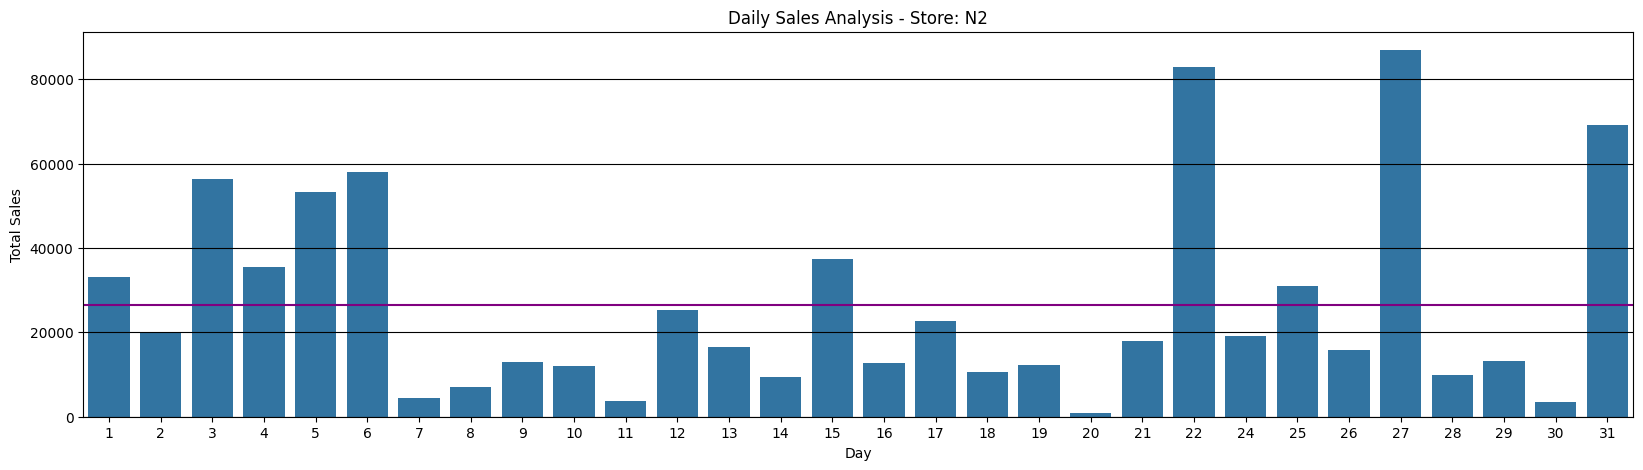

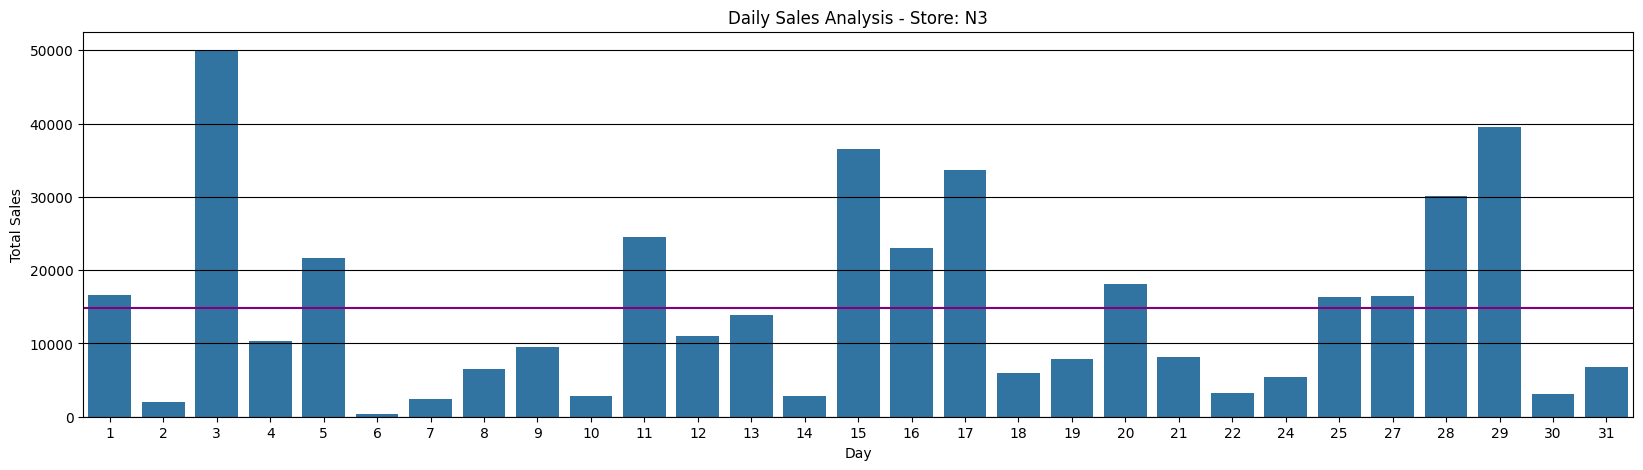

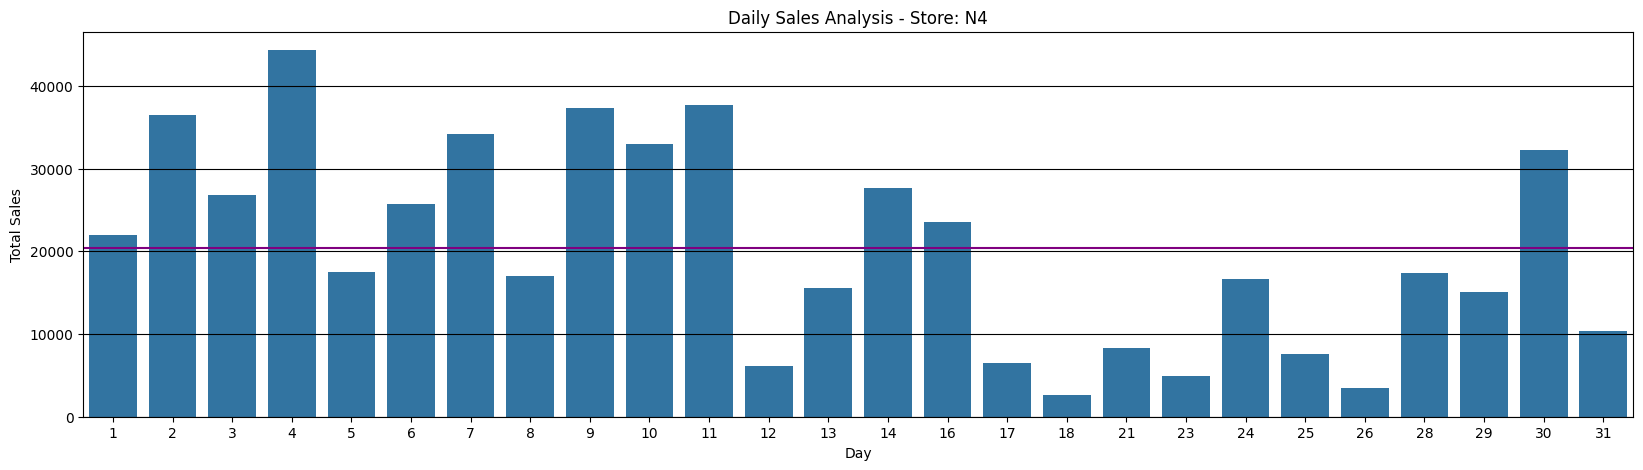

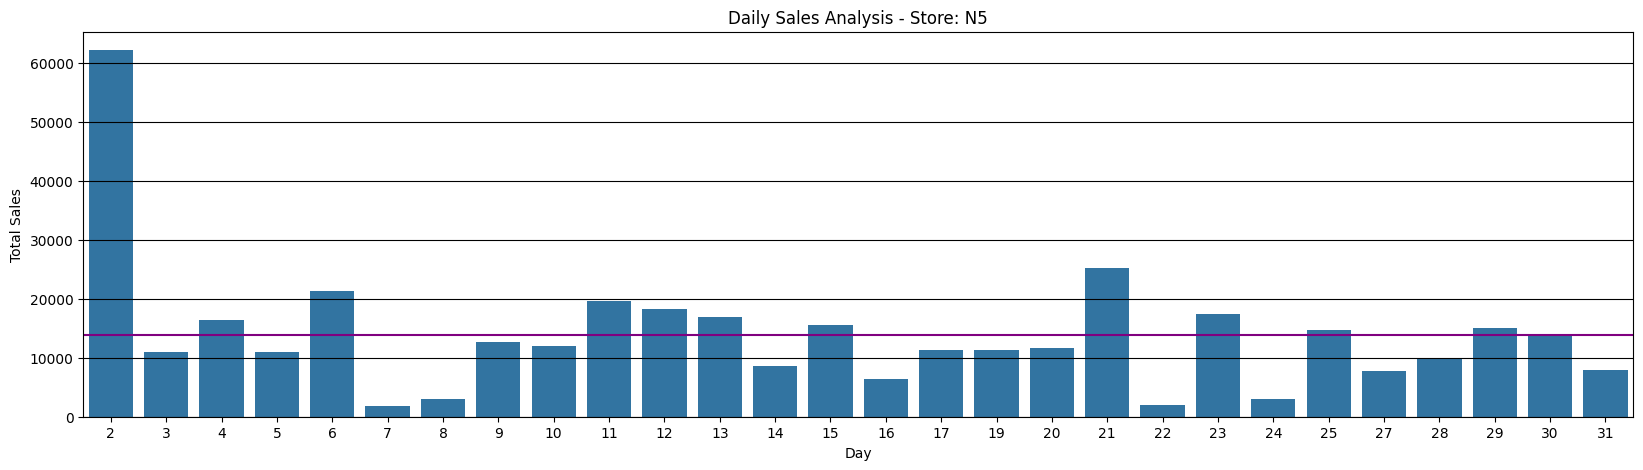

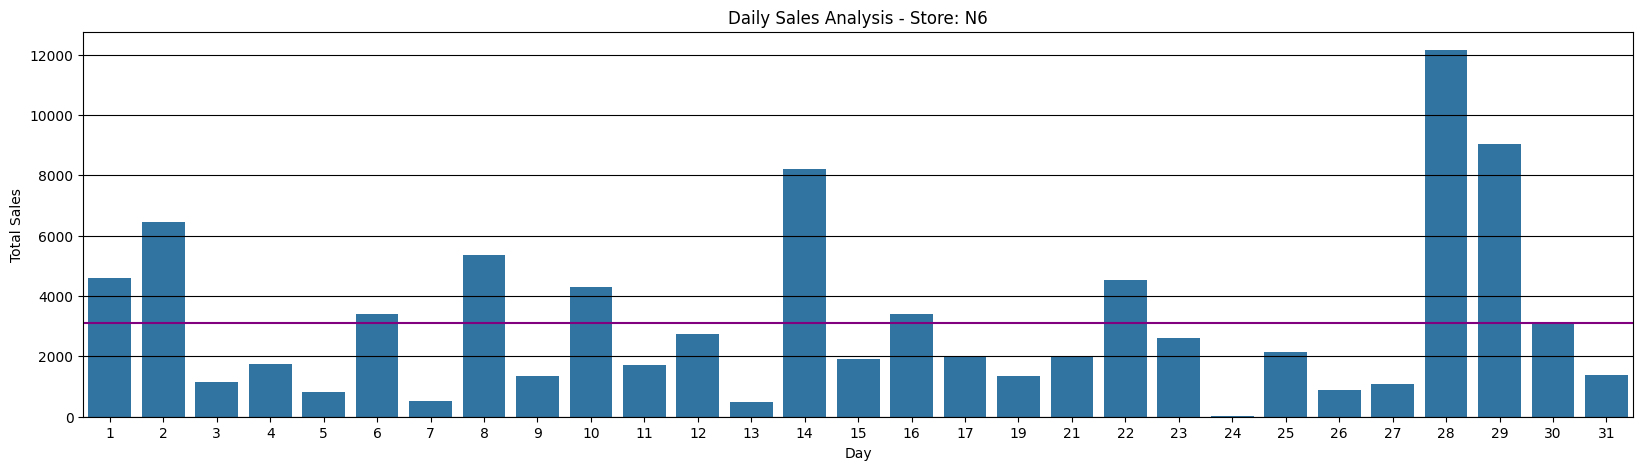

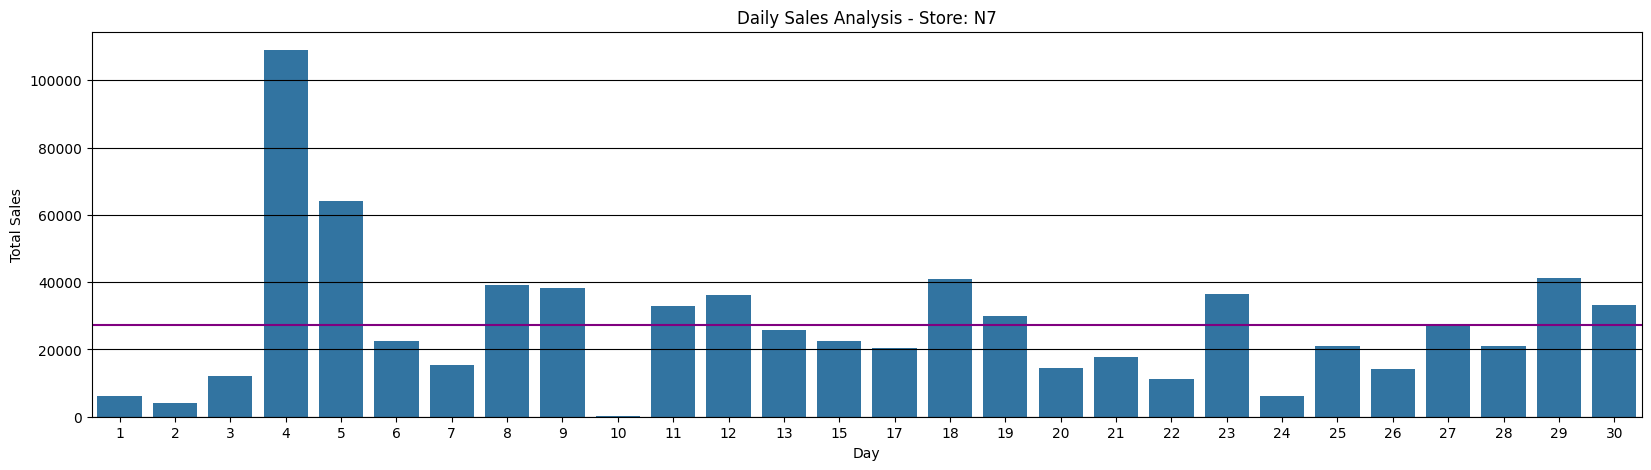

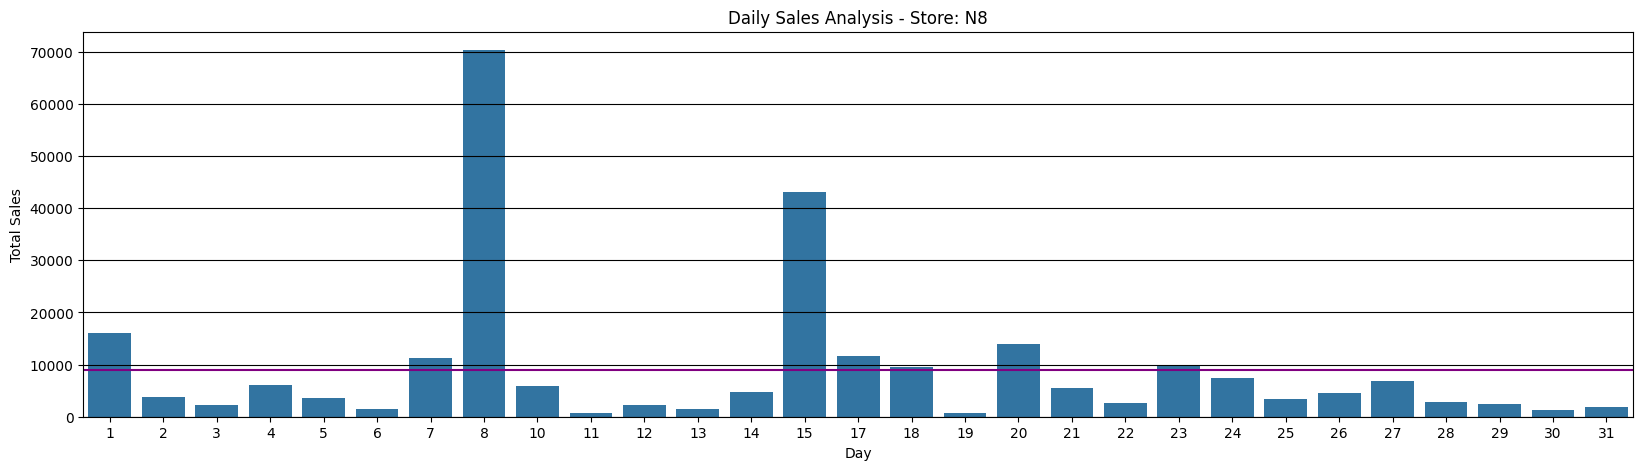

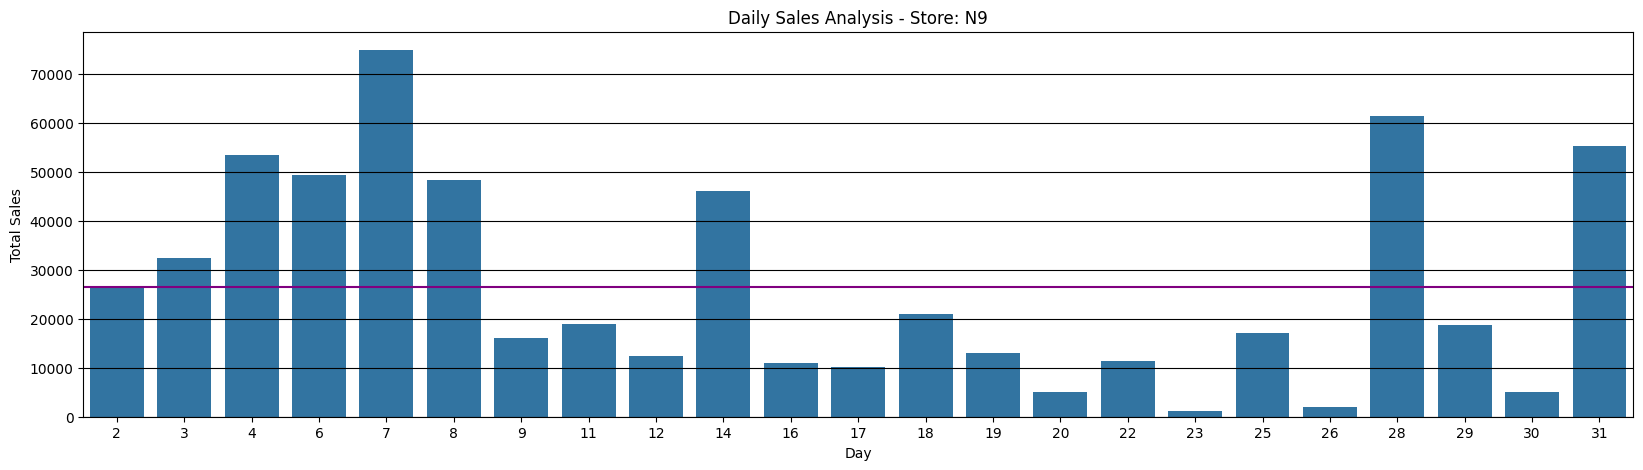

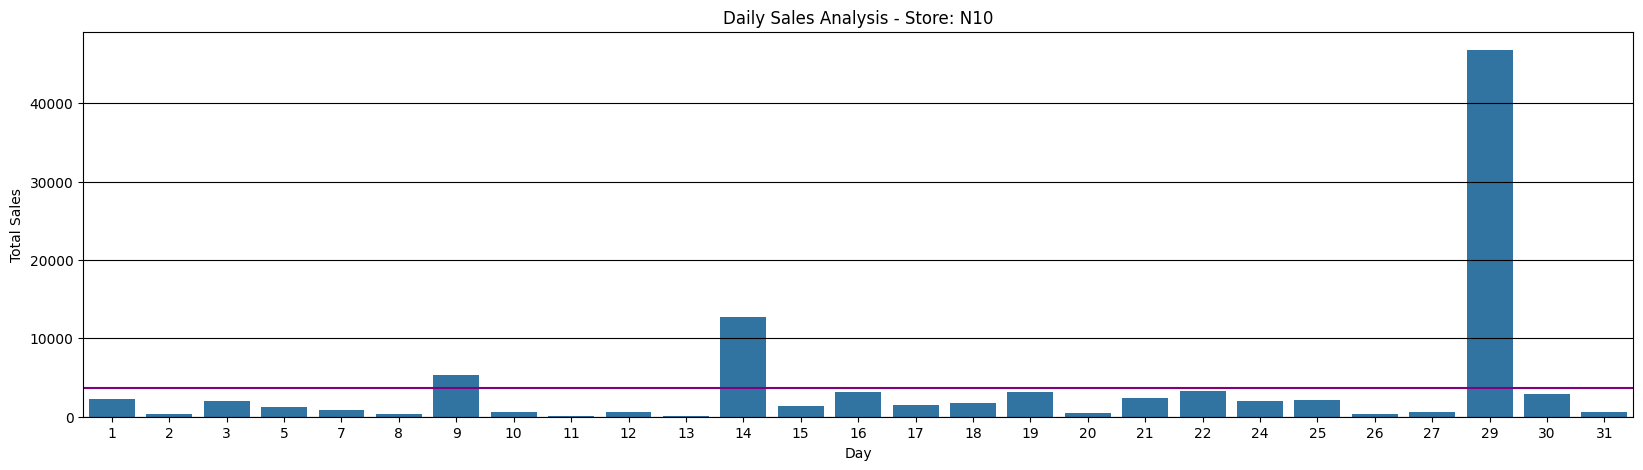

In [25]:
for i, storecode in enumerate(storeco[:10]):
    store_data = df[df['STORECODE'] == storecode]
    daily_sales = store_data.groupby("DAY")["BILL_AMT"].sum().reset_index()

    plt.figure(figsize=(20, 5))
    sns.barplot(x=daily_sales['DAY'], y=daily_sales['BILL_AMT']).axhline(daily_sales['BILL_AMT'].mean(), color='purple')
    plt.title("Daily Sales Analysis - Store: " + str(storecode))
    plt.xlabel("Day")
    plt.ylabel("Total Sales")
    plt.grid(axis='y', color='black')
    plt.show()

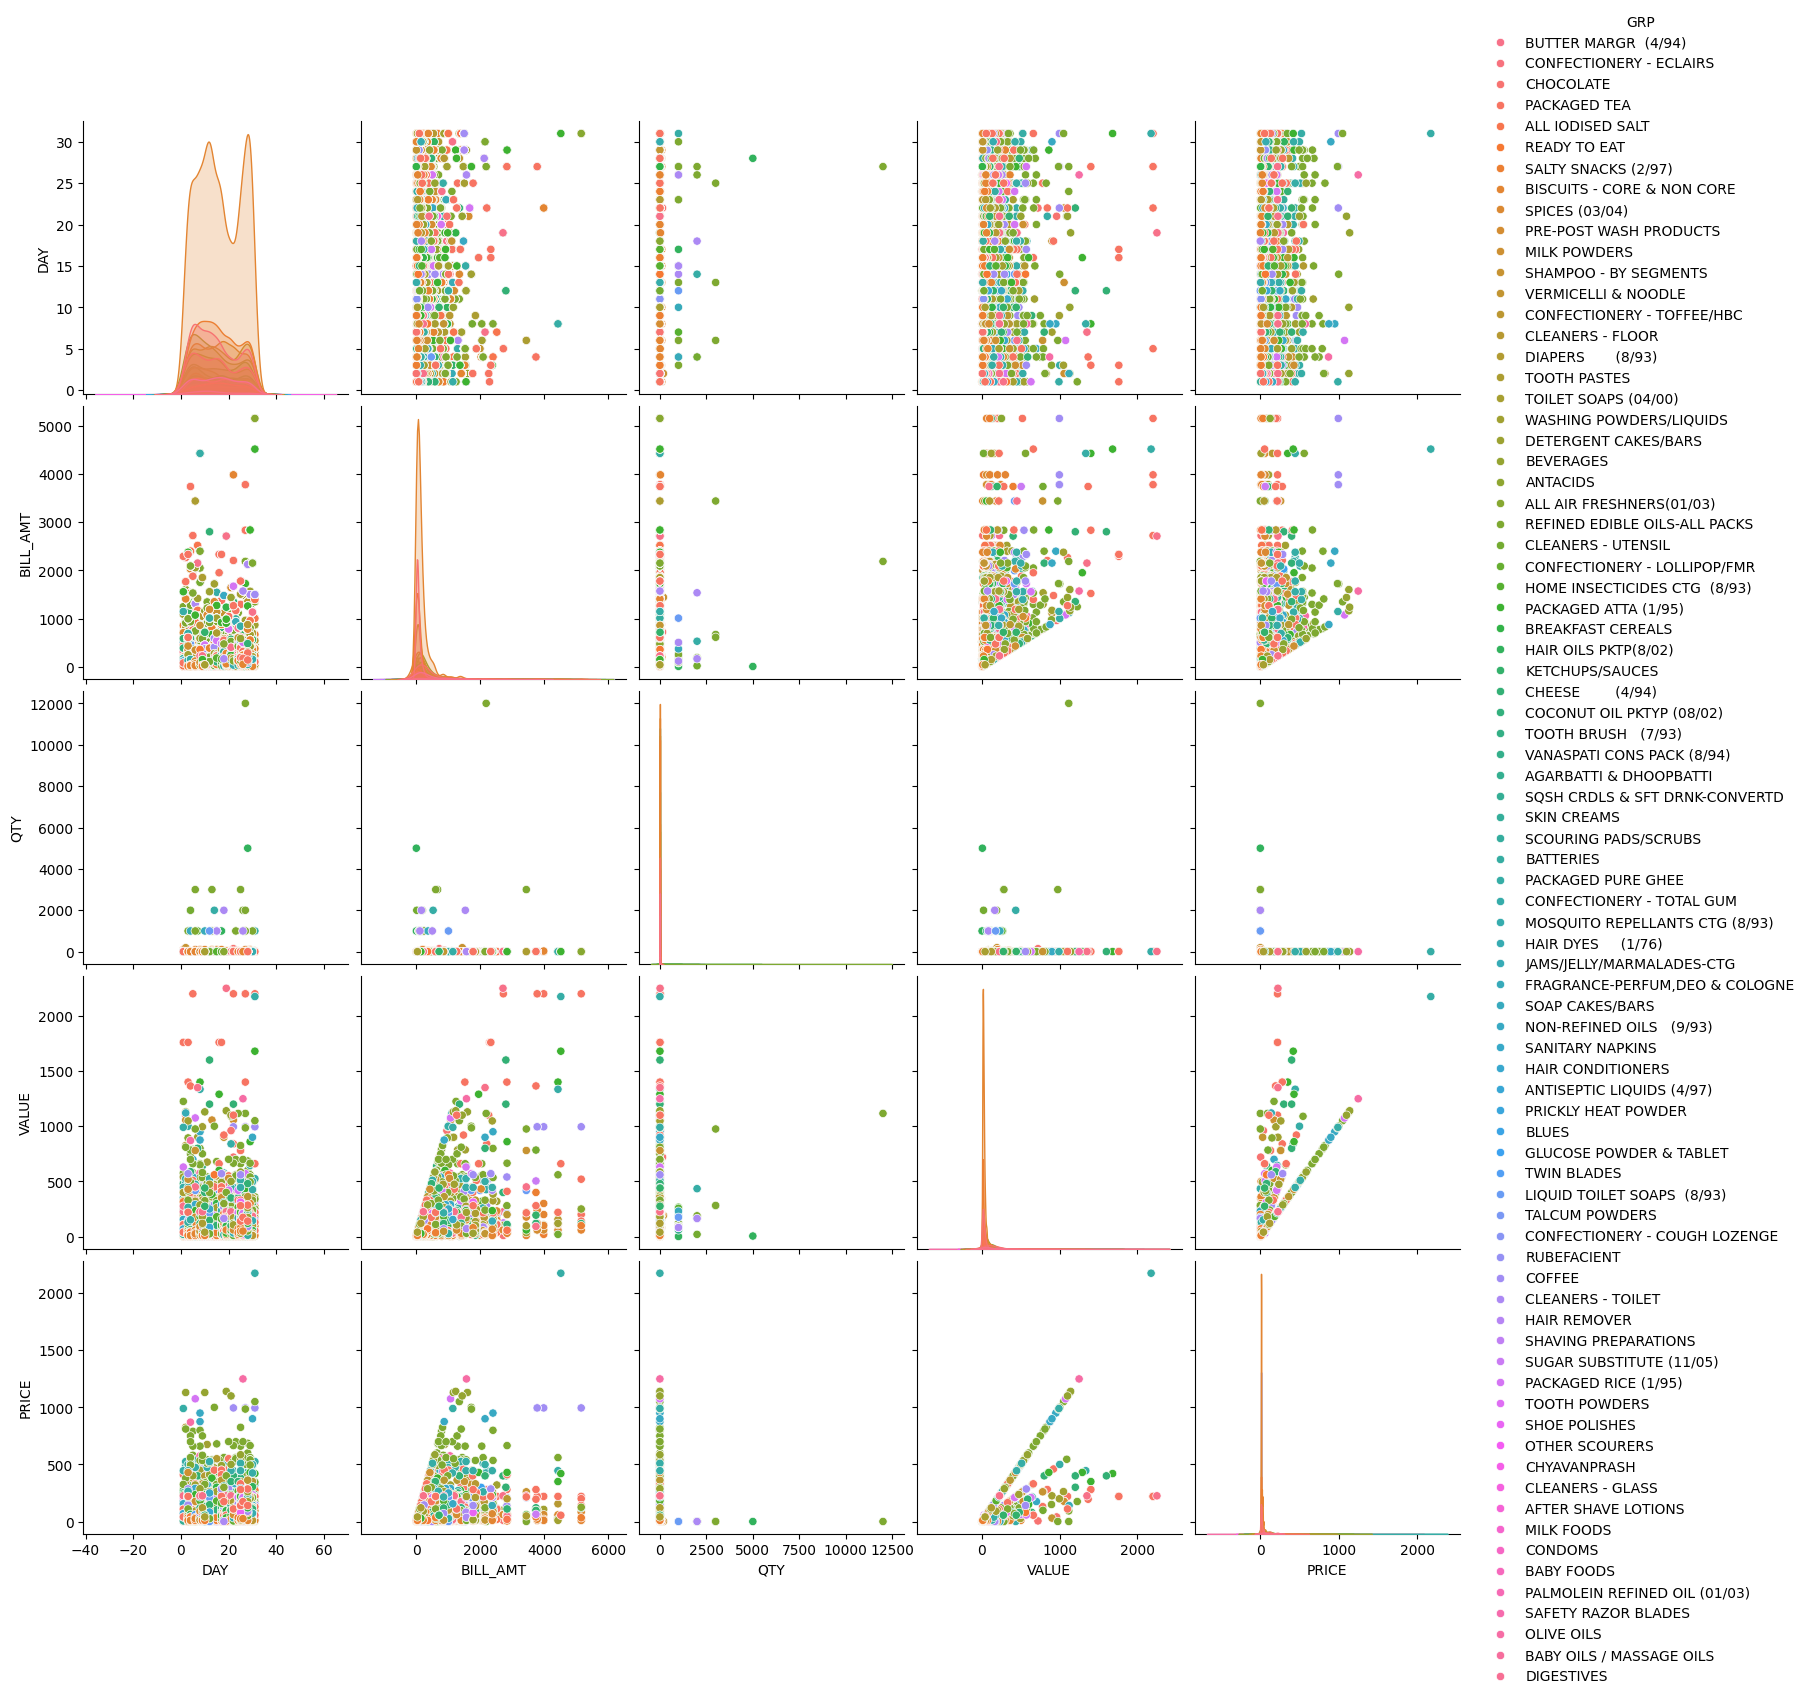

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df, hue='GRP', height=3)

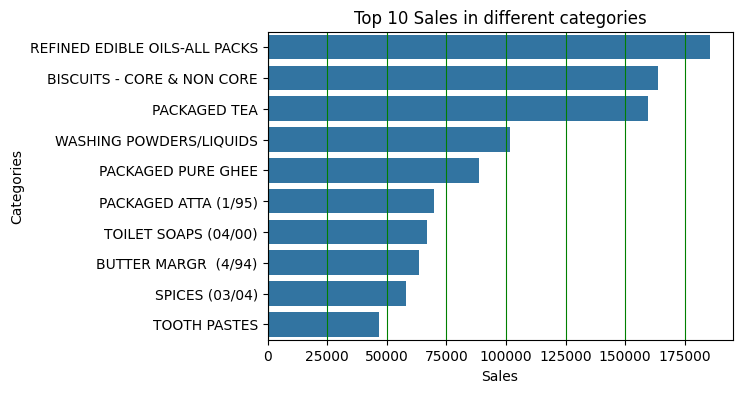

In [35]:
top_items_sales = df.groupby('GRP').sum().sort_values("VALUE",ascending=False)[['QTY','PRICE','VALUE']][0:10]
plt.figure(figsize=(6,4))
sns.barplot(x='VALUE',y=top_items_sales.index,data=top_items_sales)
plt.title("Top 10 Sales in different categories")
plt.xlabel("Sales")
plt.ylabel("Categories")
plt.grid(axis='x',color='Green');